![Polycystic kidney disease](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Polycystic_kidney_disease_--_intermed_mag.jpg/800px-Polycystic_kidney_disease_--_intermed_mag.jpg)

In [205]:
#Description: This program classifies patients as having chronic kidney disease (ckd) or not.
#             Using Artificial Neural Networks

#Resources: (1) Data set information : https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease
#           (2) Kaggle : https://www.kaggle.com/vijaygill/chronic-kidney-disease-prediction-using-keras/data

'''
Data Set Information:

age	-	age	
bp	-	blood pressure 
sg	-	specific gravity 
al	- albumin 
su	-	sugar 
rbc	-	red blood cells 
pc	-	pus cell 
pcc	-	pus cell clumps 
ba	-	bacteria 
bgr	-	blood glucose random 
bu	-	blood urea 
sc	-	serum creatinine 
sod	-	sodium 
pot	-	potassium 
hemo	-	hemoglobin 
pcv	-	packed cell volume 
wc	-	white blood cell count 
rc	-	red blood cell count 
htn	-	hypertension 
dm	-	diabetes mellitus 
cad	-	coronary artery disease 
appet	-	appetite 
pe	-	pedal edema 
ane	-	anemia 
class	-	classification

'''


'\nData Set Information:\n\nage\t-\tage\t\nbp\t-\tblood pressure \nsg\t-\tspecific gravity \nal\t- albumin \nsu\t-\tsugar \nrbc\t-\tred blood cells \npc\t-\tpus cell \npcc\t-\tpus cell clumps \nba\t-\tbacteria \nbgr\t-\tblood glucose random \nbu\t-\tblood urea \nsc\t-\tserum creatinine \nsod\t-\tsodium \npot\t-\tpotassium \nhemo\t-\themoglobin \npcv\t-\tpacked cell volume \nwc\t-\twhite blood cell count \nrc\t-\tred blood cell count \nhtn\t-\thypertension \ndm\t-\tdiabetes mellitus \ncad\t-\tcoronary artery disease \nappet\t-\tappetite \npe\t-\tpedal edema \nane\t-\tanemia \nclass\t-\tclassification\n\n'

In [0]:
#Import Libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt


In [207]:
    #load the data 
    from google.colab import files #Only use for Google Colab
    uploaded = files.upload()      #Only use for Google Colab
    df = pd.read_csv("kidney_disease.csv")
    
    #Print the first 5 rows
    df.head()

Saving kidney_disease.csv to kidney_disease (10).csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [208]:
#Get the shape of the data (the number of rows & columns)
df.shape

(400, 26)

In [0]:
#Create a list of columns to retain
columns_to_retain = ["sg", "al", "sc", "hemo",
                         "pcv", "wbcc", "rbcc", "htn", "classification"]

#columns_to_retain = df.columns, Drop the columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [0]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [211]:
#Print / show the first 5 rows of the new cleaned data set
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [0]:
#Split the data into independent'X'(the features) and dependent 'y' variables (the target)
X = df.drop(["classification"], axis=1)
y = df["classification"]

In [0]:
#Feature Scaling
#the min-max scaler method scales the dataset so that all the input features lie between 0 and 1 inclusive
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [0]:
#Split the data into 80% training and 20% testing & Shuffle the data before splitting
X_train,  X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.2, shuffle=True)

In [0]:
#Build The model
#  The models input shape/dimensions is the number of features/columns in the data set
#  The model will have 2 layers:
#      (i) The first with 256 neurons and the ReLu activation function & a initializer which 
#          defines the way to set the initial random weights of the Keras layers. 
#          We'll use a initializer that generates tensors with a normal distribution.
#     (ii) The other layer will have 1 neuron with the activation function 'hard_sigmoid'
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),
                    kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))
    

In [0]:
#Compile the model
# Loss measuers how well the model did on training , and then tries to improve on it using the optimizer.
# The loss function we will use is binary_crossentropy for binary (2) classes.
model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])

In [217]:
#Train the model
history = model.fit(X_train, y_train, 
                    epochs=2000, #The number of iterations over the entire dataset to train on
                    batch_size=X_train.shape[0]) #The number of samples per gradient update for training

229/229 [==============================] - 0s 20us/step - loss: 0.0093 - acc: 0.9956
Epoch 1494/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0093 - acc: 0.9956
Epoch 1495/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0093 - acc: 0.9956
Epoch 1496/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0093 - acc: 0.9956
Epoch 1497/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0093 - acc: 0.9956
Epoch 1498/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0093 - acc: 0.9956
Epoch 1499/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0093 - acc: 0.9956
Epoch 1500/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0093 - acc: 0.9956
Epoch 1501/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0093 - acc: 0.9956
Epoch 1502/2000
229/229 [==============================] - 0s 13us/step - loss: 0.0093 - acc: 0.9956
Epoch 

In [0]:
#Save the model
model.save("ckd.model")

W0727 02:09:51.663010 140644284258176 legend.py:1289] No handles with labels found to put in legend.


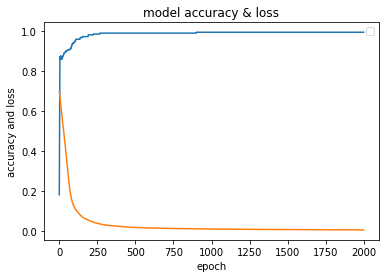

W0727 02:10:34.893824 140644284258176 legend.py:1289] No handles with labels found to put in legend.


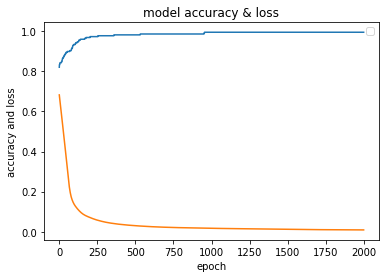

In [219]:
#Visualize the models accuracy and loss
plt.plot(history.history["acc"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend()
#plt.grid(which="both")
#plt.savefig("ckd.png")

In [220]:
print("-------------------------------------------------------------------")
print("Shape of training data: ", X_train.shape)
print("Shape of test data    : ", X_test.shape )
print("-------------------------------------------------------------------")

for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(X_test)
  pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
  scores = model.evaluate(X_test, y_test)
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("-------------------------------------------------------------------")
  print() #Print Space
    

-------------------------------------------------------------------
Shape of training data:  (229, 6)
Shape of test data    :  (58, 6)
-------------------------------------------------------------------
Model file:  ckd.model
58/58 [==============================] - 1s 17ms/step
Original  : 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1
Predicted : 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1
Scores    : loss =  0.03283378828702302  acc =  0.9827586083576597
-------------------------------------------------------------------

-------------------------------------------------------------------
Shape of training data:  (229, 6)
Shape of test data    :  (58, 6)
-------------------------------------------------------------------
Model file: